In [1]:
import numpy as np
import pandas as pd
import os, shutil
import warnings
warnings.filterwarnings("ignore")

In [2]:
# delet all file
# shutil.rmtree('/kaggle/working/Dataset')

# Create new paths and place files

In [3]:
# Define routes

# orginal path
path_file_cat = 'data/dogs_vs_cats/PetImages/Cat'
path_file_dog = 'data/dogs_vs_cats/PetImages/Dog'

base_dir = 'data/dogs_vs_cats/binclass_model'

# Train folder
Train_dir = os.path.join(base_dir, 'Train')

# cat folder in train
cat_train_dir = os.path.join(Train_dir, 'cat')

# dog folder in train
dog_train_dir = os.path.join(Train_dir, 'dog')

# Test Folder
Test_dir = os.path.join(base_dir, 'Test')

# cat folder in test
cat_test_dir = os.path.join(Test_dir, 'cat')

# dog folder in test
dog_test_dir = os.path.join(Test_dir, 'dog')

# validation folder
valid_dir = os.path.join(base_dir, 'validation')

# cat folder in validation
cat_val_dir = os.path.join(valid_dir, 'cat')

# dog folder in validation
dog_val_dir = os.path.join(valid_dir, 'dog')

In [4]:
# Creating folders
os.mkdir(base_dir)

# Train folder
os.mkdir(Train_dir)

# cat folder in train
os.mkdir(cat_train_dir)

# dog folder in train
os.mkdir(dog_train_dir)

# Test Folder
os.mkdir(Test_dir)

# cat folder in test
os.mkdir(cat_test_dir)

# dog folder in test
os.mkdir(dog_test_dir)

# validation folder
os.mkdir(valid_dir)

# cat folder in validation
os.mkdir(cat_val_dir)

# dog folder in validation
os.mkdir(dog_val_dir)

In [5]:
train_list_cat_file = [f'{i}.jpg' for i in range(6500)]
train_list_dog_file = [f'{i}.jpg' for i in range(6500)]

test_list_cat_file = [f'{i}.jpg' for i in range(6500, 9500)]
test_list_dog_file = [f'{i}.jpg' for i in range(6500, 9500)]

val_list_cat_file = [f'{i}.jpg' for i in range(9500, 12500)]
val_list_dog_file = [f'{i}.jpg' for i in range(9500, 12500)]

In [6]:
# organaize cat and dog in train folders
# cat
for filename in train_list_cat_file:
    # src = os.path.join(path_file_cat, filename)
    src = os.path.join(path_file_cat_gen, filename)
    dst = os.path.join(cat_train_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass  # Ignore the error and continue
    
# dog
for filename in train_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_train_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass  # Ignore the error and continue
    
# organaize cat and dog in test folders
# cat
for filename in test_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_test_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass  # Ignore the error and continue
    
# dog
for filename in test_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_test_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass  # Ignore the error and continue
    
# organaize cat and dog in validation folders
# cat
for filename in val_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_val_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass  # Ignore the error and continue
    
# dog
for filename in val_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_val_dir, filename)
    try:
        shutil.copyfile(src, dst)
    except FileNotFoundError:
        pass  # Ignore the error and continue

In [7]:
print("number of cat img in train folder: ", len(os.listdir(cat_train_dir)))
print("number of dog img in train folder: ", len(os.listdir(dog_train_dir)))
print("number of cat img in test folder: ", len(os.listdir(cat_test_dir)))
print("number of dog img in test folder: ", len(os.listdir(dog_test_dir)))
print("number of cat img in validation folder: ", len(os.listdir(cat_val_dir)))
print("number of dog img in validation folder: ", len(os.listdir(dog_val_dir)))

number of cat img in train folder:  6500
number of dog img in train folder:  6500
number of cat img in test folder:  3000
number of dog img in test folder:  3000
number of cat img in validation folder:  3000
number of dog img in validation folder:  3000


In [8]:
from PIL import Image
for i in os.listdir(cat_train_dir):
    try:
        Image.open(os.path.join(cat_train_dir, i))
    except:
        os.remove(os.path.join(cat_train_dir, i))
        print(i)
for i in os.listdir(dog_val_dir):
    try:
        Image.open(os.path.join(dog_val_dir, i))
    except:
        os.remove(os.path.join(dog_val_dir, i))
        print(i)

666.jpg
11702.jpg


- 666.jpg in cat folder
- 11702.jpg in dog folder

# Creating a model architecture

In [9]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Create generators

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    directory=Train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=42)

validation_generator = test_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    seed=42)
test_generator = test_datagen.flow_from_directory(
    directory=Test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    seed=42)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

Found 12999 images belonging to 2 classes.
Found 5999 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [13]:
# from keras import utils

# # train_list_cat_file & train_list_dog_file that built before
# # we pick one image from "agument"
# img_path = os.path.join(cat_train_dir, train_list_cat_file[3])
# img_path = os.path.join(dog_train_dir, train_list_dog_file[3])

# # read the image and resize it
# img = utils.load_img(img_path, target_size=(150,150))

# # Comnvert it to a numpy array with shape(150,150,3)
# x = utils.img_to_array(img)

# # Reshape it to (1, 150, 150, 3)
# x = x.reshape((1,) + x.shape)

# i = 0
# for batch in train_datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     imgplot = plt.imshow(utils.array_to_img(batch[0]))
#     i += 1
#     if i % 4 == 0:
#         break
# plt.show()


# check generator

In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (20, 150, 150, 3)
labels batch shape (20,)


# model Training

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Epoch 1/25
649/649 [==============================] - 139s 194ms/step - loss: 0.6623 - acc: 0.5913 - val_loss: 0.6237 - val_acc: 0.6490
Epoch 2/25
649/649 [==============================] - 114s 176ms/step - loss: 0.5914 - acc: 0.6796 - val_loss: 0.5141 - val_acc: 0.7562
Epoch 3/25
649/649 [==============================] - 118s 181ms/step - loss: 0.5545 - acc: 0.7141 - val_loss: 0.5019 - val_acc: 0.7599
Epoch 4/25
649/649 [==============================] - 126s 194ms/step - loss: 0.5217 - acc: 0.7370 - val_loss: 0.4823 - val_acc: 0.7711
Epoch 5/25
649/649 [==============================] - 124s 191ms/step - loss: 0.4930 - acc: 0.7618 - val_loss: 0.8816 - val_acc: 0.6478
Epoch 6/25
649/649 [==============================] - 126s 194ms/step - loss: 0.4800 - acc: 0.7674 - val_loss: 0.4399 - val_acc: 0.7977
Epoch 7/25
649/649 [==============================] - 126s 194ms/step - loss: 0.4659 - acc: 0.7793 - val_loss: 0.4032 - val_acc: 0.8184
Epoch 8/25
649/649 [============================

# Save model's weights

In [16]:
model.save_weights('first_try.h5', overwrite=True)

# Result Plot

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


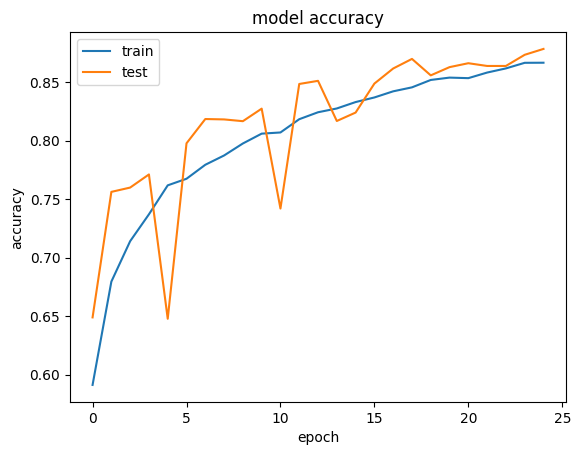

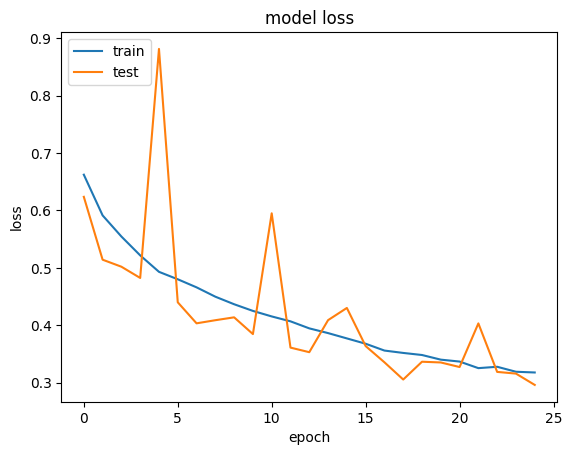

In [17]:
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Evaluate the model
model.evaluate_generator(generator=validation_generator,
steps=STEP_SIZE_VALID)

[0.2954530417919159, 0.8785952925682068]

# Save and Load the model architecture

In [19]:
saved_model = model.to_json()
import json
with open('model_architecture.json', 'w') as outfile:
    json.dump(saved_model, outfile)

In [20]:
from keras.models import model_from_json
loaded_model = model_from_json(json.load(open('model_architecture.json', 'r')))

In [21]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0